In [22]:
import pynbody
import numpy as np
import array
import math

In [23]:
import pynbody.plot.sph as sph

In [24]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [34]:
def traceThing(path, index, interval, nsteps): #tracing function
    part=[]
    t=interval
    while (t <= nsteps):
        s=pynbody.load(path+'.'+str(t).zfill(6))
        s.physical_units()
        part.append([s.gas['x'][index],s.gas['y'][index],s.gas['z'][index]])
        t+=interval
    return part #should be array of 3tuples.
def radialIndexFinder(path,rmin,rmax):
    i=0
    l=[]
    s=pynbody.load(path)
    s.physical_units()
    k=s.gas['pos']
    for p in k:
        if(rmin<=np.linalg.norm(p)<=rmax):
            l.append(i)
        i+=1
    return l
def maxDensity(path, ring, nSec): #returns indices of particles in ring
    i=0.0
    theta=2*math.pi/nSec
    s=pynbody.load(path)
    ray= [[]]*nSec
    x=0
    while (x<nSec):
        for l in ring:
            if i<= np.arctan2(s.gas['x'][l],s.gas['y'][l]) <i+theta:
                ray[x].append(l)
        i+=theta
        x+=1
    x=0
    xm=0
    z=len(ray[0])
    for k in ray:
        if len(k) > z:
            z=len(k)
            xm=x
        x+=1
    return [[xm*theta,(xm+1)*theta],ray[xm]]
def spiralFinder(path,rmin,rmax,nSec): #finds highest density slice in an area. Hopefully should pick out spiral arms. likely error prone.
    k=radialIndexFinder(path,rmin,rmax)
    return maxDensity('path',k,nSec)
def sectorFinder(path,xmin,xmax,ymin,ymax): #picks out particles in a given square.
    s=pynbody.load(path)
    s.physical_units()
    k=s.gas['pos']
    l=[]
    i=0
    for p in k:
        if (xmin<=p[0]<xmax and ymin<=p[1]<ymax):
            l.append(i)
        i+=1
    return l

In [63]:
s = pynbody.load('expDist/expDist.001000')
s.physical_units()

#pynbody.analysis.halo.center(s,mode='hyb')

In [32]:
#k=radialIndexFinder('expDist/expDist.001000',9,10)
maxDensity('expDist/expDist.001000',k,100)

[[0.0, 0.06283185307179587],
 [10738,
  17587,
  24742,
  33126,
  33647,
  33877,
  49864,
  50360,
  51884,
  54534,
  56925,
  59037,
  59434,
  65166,
  81179,
  81379,
  85517,
  86184,
  89480,
  94866,
  96954,
  106005,
  109169,
  118356,
  131918,
  135061,
  157738,
  177930,
  178025,
  274,
  2282,
  3788,
  7889,
  14522,
  15636,
  21235,
  27941,
  32755,
  45098,
  46015,
  50677,
  51678,
  53520,
  64848,
  77205,
  85261,
  87068,
  88429,
  92066,
  98248,
  98404,
  98499,
  105862,
  109188,
  109663,
  123142,
  128376,
  131285,
  134486,
  139709,
  141056,
  143373,
  147867,
  153693,
  156969,
  160685,
  171065,
  173373,
  175061,
  178779,
  192046,
  196584,
  198846,
  9805,
  18049,
  25738,
  29975,
  37248,
  60594,
  71115,
  79869,
  88159,
  97025,
  113718,
  122053,
  126803,
  130816,
  135740,
  146724,
  160656,
  164012,
  166693,
  168377,
  170568,
  173392,
  173625,
  173894,
  178277,
  185603,
  195161,
  195358,
  195905,
  821,
  11

In [106]:
t=1
part=[]
while (t <= 100):
    s=pynbody.load('expDist2/expDist.00'+str(t).zfill(4))
    s.physical_units()
    part.append([s.gas['x'][0],s.gas['y'][0],s.gas['z'][0]])
    t+=1


[[-29.910686492919922, -12.221795082092285, 8.52682113647461],
 [-29.744314193725586, -12.518341064453125, 8.51465129852295],
 [-29.549837112426758, -12.802373886108398, 8.495025634765625],
 [-29.329681396484375, -13.074926376342773, 8.467438697814941],
 [-29.082210540771484, -13.335164070129395, 8.432422637939453],
 [-28.807519912719727, -13.582987785339355, 8.390453338623047],
 [-28.50347900390625, -13.816088676452637, 8.342201232910156],
 [-28.17255210876465, -14.035008430480957, 8.286002159118652],
 [-27.815319061279297, -14.239924430847168, 8.222201347351074],
 [-27.4321346282959, -14.430902481079102, 8.150256156921387],
 [-27.022680282592773, -14.607076644897461, 8.069918632507324],
 [-26.58662223815918, -14.767804145812988, 7.980336666107178],
 [-26.123842239379883, -14.913877487182617, 7.882472038269043],
 [-25.636205673217773, -15.046393394470215, 7.776400089263916],
 [-25.122573852539062, -15.163614273071289, 7.662332534790039],
 [-24.582765579223633, -15.265131950378418, 7.5

In [102]:
part=traceThing('expDist2/expDist',1,1,100)

In [105]:
traceThing('expDist3/expDist',500,3,1000)

[[-45.98927688598633, -6.695766448974609, -95.95234680175781],
 [-45.76157760620117, -8.046436309814453, -95.80569458007812],
 [-45.48636245727539, -9.387384414672852, -95.56177520751953],
 [-45.163673400878906, -10.717198371887207, -95.2197036743164],
 [-44.79318618774414, -12.03535270690918, -94.77818298339844],
 [-44.37409210205078, -13.341314315795898, -94.23715209960938],
 [-43.906776428222656, -14.633734703063965, -93.59657287597656],
 [-43.39155197143555, -15.91055679321289, -92.85479736328125],
 [-42.827850341796875, -17.1711483001709, -92.01078796386719],
 [-42.217071533203125, -18.414775848388672, -91.06377410888672],
 [-41.559574127197266, -19.638877868652344, -90.01263427734375],
 [-40.854339599609375, -20.840391159057617, -88.85516357421875],
 [-40.09947204589844, -22.015716552734375, -87.58902740478516],
 [-39.295143127441406, -23.16181755065918, -86.21353912353516],
 [-38.44028091430664, -24.27683448791504, -84.72712707519531],
 [-37.53532791137695, -25.357196807861328, 

SimArray([[ 77999.72 ,  73728.53 ,  69457.33 , ...,  33419.49 ,
            30459.275,  27499.062],
          [ 76416.57 ,  72241.36 ,  68066.15 , ...,  33230.445,
            30523.012,  27815.576],
          [ 74833.42 ,  70754.19 ,  66674.95 , ...,  33041.4  ,
            30586.746,  28132.09 ],
          ...,
          [145433.56 , 141064.72 , 136695.86 , ..., 118246.08 ,
           120051.19 , 121856.3  ],
          [148763.66 , 144157.77 , 139551.86 , ..., 110098.78 ,
           111841.97 , 113585.15 ],
          [152093.77 , 147250.81 , 142407.86 , ..., 101951.49 ,
           103632.74 , 105314.   ]], dtype=float32, 'Msol kpc**-3')

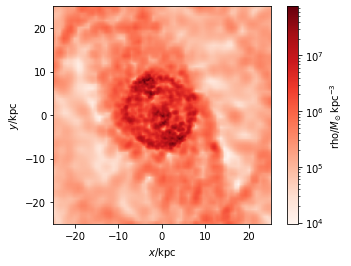

In [92]:
pynbody.analysis.angmom.faceon(s)
sph.image(s.g,width=50,cmap='Reds')

In [44]:
pynbody.analysis.angmom.sideon(s.d)
sph.image(s.dm,width=10000,qty='rho')

ValueError: Insufficient particles around center to get velocity

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


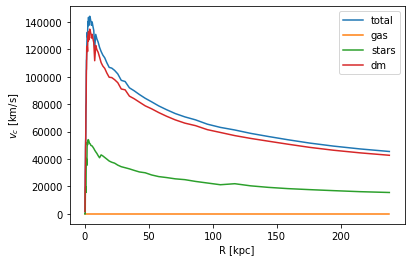

In [38]:
s.physical_units()
p = pynbody.analysis.profile.Profile(s,min=.01,max=250,type='log',ndim=3)
pg = pynbody.analysis.profile.Profile(s.g,min=.01,max=250,type='log',ndim=3)
ps = pynbody.analysis.profile.Profile(s.s,min=.01,max=250,type='log',ndim=3)
pd = pynbody.analysis.profile.Profile(s.d,min=.01,max=250,type='log',ndim=3)

# make the plot
plt.plot(p['rbins'],p['v_circ'],label='total')
plt.plot(pg['rbins'],pg['v_circ'],label='gas')
plt.plot(ps['rbins'],ps['v_circ'],label='stars')
plt.plot(pd['rbins'],pd['v_circ'],label='dm')

plt.xlabel('R [kpc]')
plt.ylabel(r'$v_c$ [km/s]')
plt.legend()

In [15]:
s.dm

<SimSnap "noahDistribution/noahgasnostars/noahgasnostars.000100::dm" len=200000>